In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Binomial Distribution

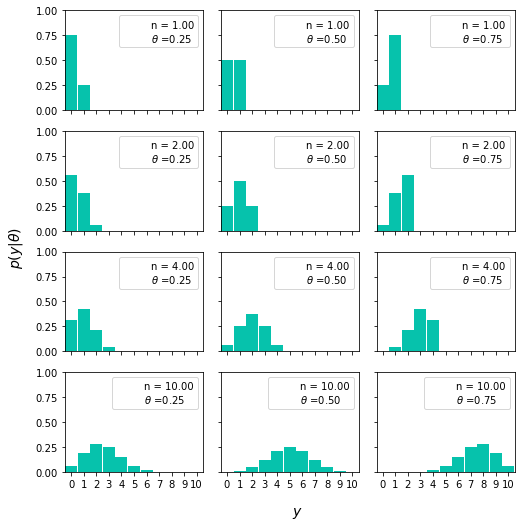

In [36]:
n_params = [1, 2, 4, 10]
p_params = [0.25, 0.5, 0.75]

x = np.arange(0, max(n_params)+1)

f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(7,7))

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        
        y = stats.binom(n=n, p=p).pmf(x)
        
        ax[i,j].vlines(x, 0, y, colors='xkcd:turquoise', lw=12)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\n$\\theta$ ={:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

ax[0,0].set_xticks(x)
f.text(-0.035, 0.5, '$p(y|\\theta)$', fontsize=14, va='center', rotation='vertical')
f.text(0.54, -0.03, '$y$', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

### Beta Distribution

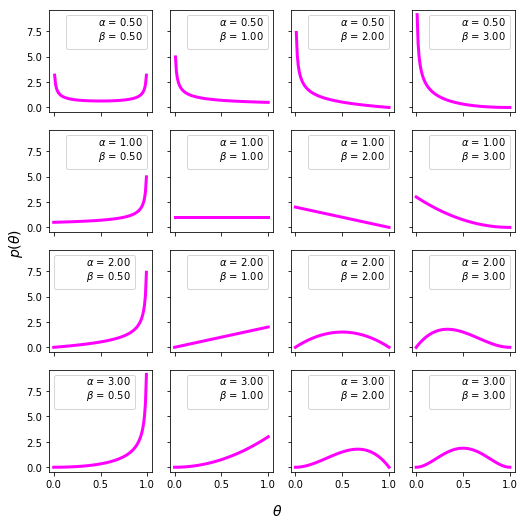

In [50]:
params = [0.5, 1, 2, 3]

x = np.linspace(0, 1, 100)

f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(7,7))

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        
        y = stats.beta(a, b).pdf(x)
        
        ax[i,j].plot(x, y, color='#FF00FF', lw=3)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=10)

f.text(-0.035, 0.51, '$p(\\theta)$', fontsize=14, va='center', rotation='vertical')
f.text(0.5, -0.03, '$\\theta$', fontsize=14, ha='center')
plt.tight_layout()
plt.show()

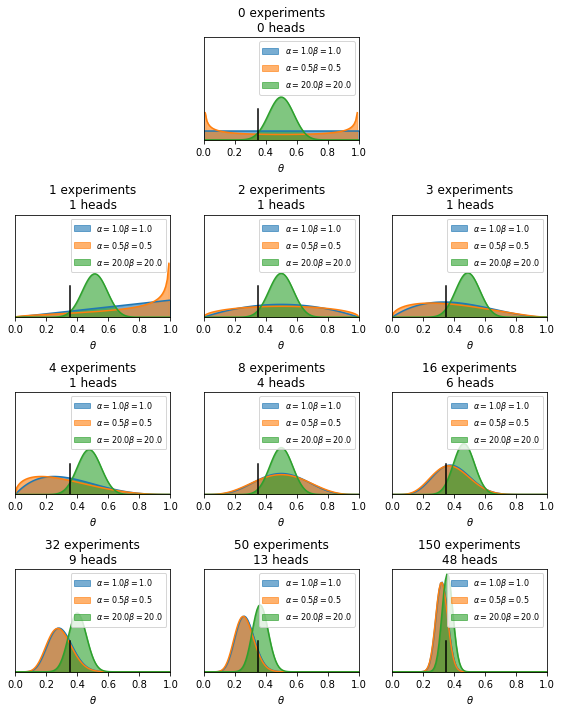

In [66]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150] # N (number of measurements)
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]      # y (Number of positive measurements)

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
x = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8, 10))
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
        
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('C0', 'C1', 'C2')):
        # Analytical result
        p_theta_given_y = stats.beta.pdf(x, a_prior + y, b_prior + N - y)
        
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6, 
                         label="$\\alpha ={:.1f}  \\beta = {:.1f}$".format(a_prior, b_prior))

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.title("{:d} experiments\n{:d} heads".format(N, y))
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.legend(fontsize=8)
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()